## Plotting Merged/Split Tracks
-----------------

This notebook reads output data from Hanley and Caballero, and plots those cyclones which
display a merge or split.



<IPython.core.display.Javascript object>


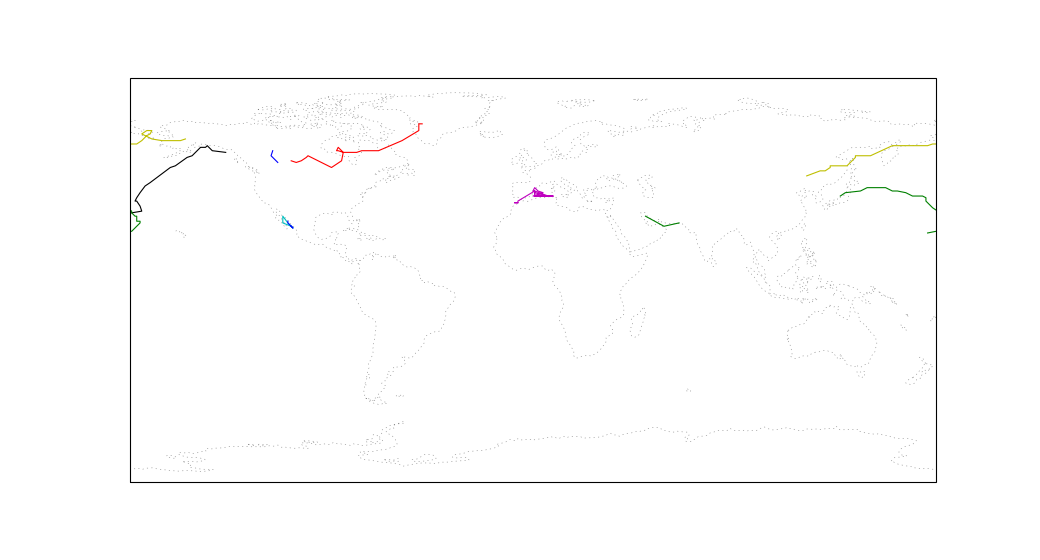

Found merge/split for cyclone no:  1
Starting at 1990-10-02T00
Ending at 1990-10-02T18
Lasting:  18 hours
Found merge/split for cyclone no:  2
Starting at 1990-10-02T18
Ending at 1990-10-03T06
Lasting:  12 hours
Found merge/split for cyclone no:  4
Found merge/split for cyclone no:  4
Found merge/split for cyclone no:  4
Starting at 1990-10-02T12
Ending at 1990-10-08T00
Lasting:  132 hours
Found merge/split for cyclone no:  21
Starting at 1990-10-05T06
Ending at 1990-10-07T06
Lasting:  48 hours
Found merge/split for cyclone no:  22
Starting at 1990-10-06T00
Ending at 1990-10-12T06
Lasting:  150 hours
[ 353.25  351.75  353.25  353.25  353.25  360.75  366.75  360.75  360.75
  360.75  360.75  360.75  360.75  360.75  362.25  369.    369.    360.
  360.    360.    360.    360.    364.5   362.25  360.75  360.  ]
Found merge/split for cyclone no:  33
Found merge/split for cyclone no:  33
Starting at 1990-10-04T18
Ending at 1990-10-13T18
Lasting:  216 hours
Found merge/split for cyclone no:  3

In [75]:
%matplotlib notebook
import numpy as np
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

datfile = 'cyclones.txt'

data = open(datfile)

num_cyclones = 51

cyclones_identified = 0

proj = ccrs.PlateCarree(central_longitude=0)
plt.figure(figsize=(13,7))
ax = plt.axes(projection=proj)
ax.coastlines(color='grey',linewidth=0.5,linestyle='dotted')
ax.set_global()
while(cyclones_identified < num_cyclones):
    line = data.readline()
    fields = line.split()
    if len(fields) == 0: # empty line
        cyclones_identified += 1
        print 'Identified %d cyclones'%(cyclones_identified)
        continue
    if len(fields) == 3: #start of new cyclone record
        reading_data = True
        merge_or_split = False
        lon = []
        lat = []
        dates = []
        while reading_data:
            
            dataline = data.readline()
            fields = dataline.split()
            if len(fields) == 16: # data line
                lon.append(float(fields[8]))
                lat.append(float(fields[9]))
                dates.append(np.datetime64('-'.join([fields[4],fields[5],fields[6]])+'T'+fields[7]))
                if fields[13] == 'True' or fields[14] == 'True': #Merge/Split recorded in data
                    print 'Found merge/split for cyclone no: ', cyclones_identified
                    merge_or_split = True
                
            elif len(fields) == 0: #finished reading data
                reading_data = False
                temp_lon = np.array(lon)
                temp_lat = np.array(lat)
                if np.any(temp_lon > 350.):
                    if temp_lon.min() < 50:
                        temp_lon[temp_lon<300] += 360
                if merge_or_split:
                    ax.plot(temp_lon,temp_lat,transform=proj)
                    print "Starting at", dates[0]
                    print "Ending at", dates[-1]
                    print "Lasting: ", dates[-1] - dates[0]
                    if np.any(temp_lon > 360): print temp_lon
                #else:
                    #ax.plot(lon,lat,'r',transform=proj)
                cyclones_identified += 1
                #print 'Identified %d cyclones'%(cyclones_identified)
                
